# Лабораторная работа №2 <a id='intro'></a>

- [Предварительная обработка](#2.1)
- [Построение точечной диаграммы](#2.2)
- [Исследование зависимостей между переменными](#2.3)
- [Тепловая карта](#2.4)
- [Интерпретация результатов](#2.5)
- [Изучение целевого потока](#2.6)
- [Выводы](#2.7)
- [Дополнительное задание](#2.8)


## Предварительная обработка данных <a id='2.1'></a>

Проведём осмотр данных на предмет ошибок.

В начале выполнения данной лабораторной работы необходимо перед основными действиями обработать данные от *пропусков*, *явных* и *неявных* *дубликатов* и *привести столбцы* к правильным типам данных. Для проведения каждого из данных действий в библиотеке **Pandas** существуют отдельные функции.

Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм из CSV-файла:

In [29]:
import pandas as pd

read_csv = pd.read_csv('6и9games.csv', sep=',')
data = pd.DataFrame(read_csv)


Также, при помощи импорта библиотеки "`warnings`" уберём все предупреждения, которые точно появятся при дальнейшей работе.

In [30]:
import warnings

warnings.filterwarnings('ignore')

Далее, выведем первые **20** строк в получившейся таблице, чтобы оценить качество данных на предмет необходимости *обработки от пропусков*:

In [31]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Как видно из результатов вывода, в таблице присутствуют пустые значения, которые обозначаются как "`NaN`". Значит, датафрейм необходимо обработать от них.

От пропусков можно избавиться двумя способами:
  1) **Полностью удалить строки с пустыми значениями**. Данный способ не применим для этого датасета, поскольку вместе с пустыми значениями удаляемой строки, также будут удалены и не пустые, т.е. *таблица неизбежно потеряет данные*;
  
  2) **Заменить пропуски другими значениями**. Этот способ уже более применим к текущему датасету. Однако, придется посчитать количество пустых значений по каждому из столбцу и иметь в виду, что в столбцах, где есть пропуски, *данные будут слегка искажены*.

Поскольку второй способ является более рациональным в данном случае, то для начала посмотрим и просуммируем пустые значения по всей таблице. Для этого используется специальный метод `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [32]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Как видно из полученного ответа, во многих столбцах есть пропуски. Таким образом, можно сделать вывод о том, что последние три столбца, а именно: "`Critic_Score`", "`User_Score`" и "`Rating`" в последующих операциях использовать не имеет смысла. Также, по 2 пустых значения присутствуют в столбцах "`Name`" и "`Genre`". От этих пустых строк можно избавиться, ведь они больших потерь данных за собой не несут. Помимо всего прочего, пустые значения присутствуют в столбце "`Year_of_Release`", избавиться от которых путем удаления не получится, следовательно, единственный оставшийся вариант, это замена их на нулевые значения.

Для удаления пустых строк в столбце "`Name`" и "`Genre`" используют метод "`.dropna()`". Воспользуемся данным методом для заданного датасета.

In [33]:
data = data.dropna(subset=['Name', 'Genre'])
data.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64

Далее, займёмся заполнением пустых значений нулями. Для этого вызывают специальный метод "`.fillna()`". Воспользуемся данным методом для трёх столбцов.

In [34]:
data['Critic_Score'] = data['Critic_Score'].fillna(0)
data['User_Score'] = data['User_Score'].fillna(0)
data['Rating'] = data['Rating'].fillna('-')
data.isna().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
NA_sales             0
EU_sales             0
JP_sales             0
Other_sales          0
Critic_Score         0
User_Score           0
Rating               0
dtype: int64

Далее, следующим этапов при предварительной обработке данных является поиск дубликатов.

Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [7]:
data.duplicated().sum()

0

Получается, что **полностью повторяющихся строк в данном датасете нету**, что хорошо.

Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

In [8]:
col = data.columns
for column in col:
    print(data[column].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e

В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

И в конце, необходимо привести все типы данных к их реальным данным. Чтобы начать приводить данные в порядок, для начала необходимо оценить данные методом "`.info()`" и вывести несколько строк данных методом "`.head()`" с некоторым параметром, например `10`.

In [9]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  float64
 9   User_Score       16713 non-null  object 
 10  Rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,-
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,-
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0,-
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0,-


Исходя из выводимых сообщений, можно сделать вывод о том, что в данном датасете есть столбец, данные которого имеют неверный тип данных, а именно "`Year_of_Release`", которые должны иметь тип данных "*datetime*".

Превращение в необходимый тип данных происходит при помощи метода "`to_datetime()`". Учитывая все это, изменим тип данных по данному образцу.

In [35]:
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

И проверим получившийся результат воспользовавшись функцией `'.info()'`.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16713 non-null  object        
 1   Platform         16713 non-null  object        
 2   Year_of_Release  16444 non-null  datetime64[ns]
 3   Genre            16713 non-null  object        
 4   NA_sales         16713 non-null  float64       
 5   EU_sales         16713 non-null  float64       
 6   JP_sales         16713 non-null  float64       
 7   Other_sales      16713 non-null  float64       
 8   Critic_Score     16713 non-null  float64       
 9   User_Score       16713 non-null  object        
 10  Rating           16713 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


Таким образом, подводя итог данной части лабораторной работы, можно сделать вывод о том, что *предварительная обработка данных прошла успешно*. Значит, можно приступать к остальным этапам лабораторной работы.

[Вернуться в начало](#intro)

## Построение точечной диаграммы <a id='2.2'></a>

В данной части отчета построим матрицы диаграмм рассеяния и выполним их анализ

Для начала нужно понять, что диаграмма рассеяния показывает зависимость разных значений друг от друга. Таким образом, в начале изучим все числовые характеристики, которые присутствуют в данном датасете. Сделать это возможно при помощи специального метода "`.describe()`", который выведет основную информацию о числовых значениях.

In [12]:
data.describe()

,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343,33.578053
std,0.813565,0.503359,0.308871,0.186742,35.818495
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000,0.000000
75%,0.240000,0.110000,0.040000,0.030000,70.000000
max,41.360000,28.960000,10.220000,10.570000,98.000000


Как видно из полученного ответа, выводится целая таблица различных данных по разным столбцам. При анализе выясняется, что:

- **Первая строка** - количество записей в основном датасете;
- **Вторая строка** - среднее арифметическое среди всех значений столбца;
- **Третья строка** - средне квадратическое отклонение значений в столбце;
- **Четвертая строка** - минимальное значение столбца;
- **5-7 строки** - значение по квартилям в данном столбце (от первого до третьего квартиля соответственно);
- **Восьмая строка** - максимальное значение столбца.

Из данной таблицы видно, что, например, среднее значение продаж в Североамериканском регионе примено равняется 263 000 копий игр, а тот же показатель в Японии оказывается на уровне 77 000 копий. Также, можно заметить, что наибольшоое число продаж игры в Европе равняется 28 миллионам копий одной игры. Ну и наконец, во всех столбцах число записей из основной таблицы равняется 16 713 значений, следовательно, нигде не присутствуют пустые строки, все зависимы между собой.

Далее, для полноты картины выведем и изучим гистограммы, которые будут созданы при помощи метода "`.hist()`".

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>,
        <AxesSubplot:title={'center':'EU_sales'}>],
       [<AxesSubplot:title={'center':'JP_sales'}>,
        <AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

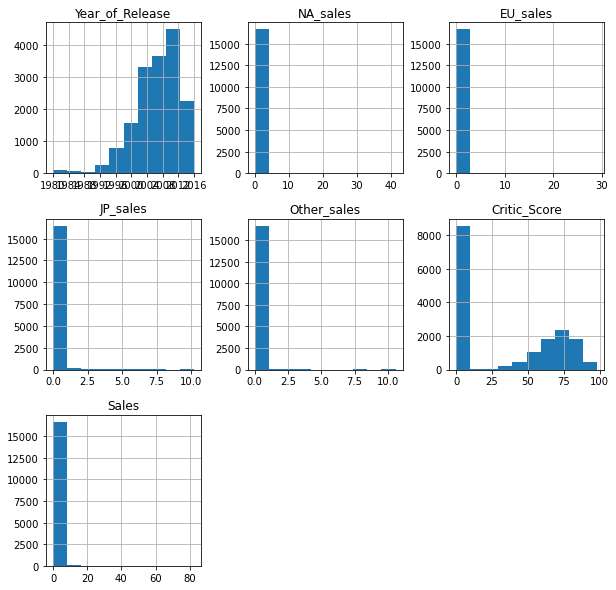

In [26]:
data.hist(figsize=(10,10))

В выводимых гистограммах по оси ординат берётся количество записей в таблице, а по оси абсцисс - значения в ячейках датасета. Поскольку исходный датасет состоит из `16715` строк, то есть считается достаточно большим, то данные гистограммы искажены, ведь внутри таблицы имеется очень много нулевых значений. Отсюда и эти столбцы в диапазоне от 0 до 10 на всех графиках, кроме гистограммы с годами издания соответственно. Также, поскольку данные о продажах указаны в миллионах, но без нулей (т.е. просто количество миллионов), то от этого получается, что все значения с продажами на гистограмме выглядят как один столбец, хотя это не так.

Теперь, необходимо найти данные, которые будут хоть как-то между собой взаимосвязаны. Очевидно, что для того, чтобы найти взаимосвязь между данными, необходимо построить один график для двух данных. При этом необходимо использовать особый тип графика - `scatter`. 

Для построения такого графика существует метод "`.plot()`", в параметрах которого записываются значения по оси абсцисс, оси ординат и тип графика. 

Попробуем построить такой график для столбцов "`NA_sales`" и "`EU_sales`".

<AxesSubplot:xlabel='NA_sales', ylabel='EU_sales'>

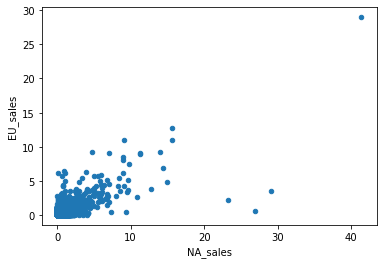

In [14]:
data.plot(x='NA_sales', y='EU_sales', kind='scatter')

Исходя из полученного графика, можно сделать вывод о том, что эти столбцы слегка связаны, т.е. чем больше продажи в "`NA`", тем больше и в "`EU`". Но это работает не всегда, поскольку на графике есть несколько точек, для которых продажи в "`NA`" регионе больше, чем в "`EU`" регионе.

Поэтому попробуем построить такой же график, но для столбцов "`NA_sales`" и "`JP_sales`".

<AxesSubplot:xlabel='NA_sales', ylabel='JP_sales'>

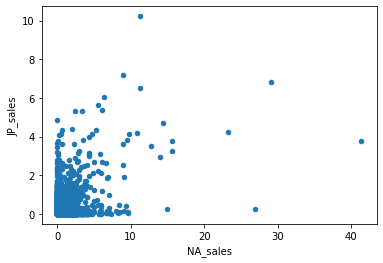

In [15]:
data.plot(x='NA_sales', y='JP_sales', kind='scatter')

Исходя из полученного вывода, можно сделать вывод о том, что рынки компьютерных игр *Японии* и *Северной Америки* взаимосвязаны между собой гораздо меньше, чем *Северной Америки* и *Европы*. 

Из полученного графика не получается никакая зависимость, поэтому попробуем построить график для "`NA_sales`" и "`Other_sales`".

<AxesSubplot:xlabel='NA_sales', ylabel='Other_sales'>

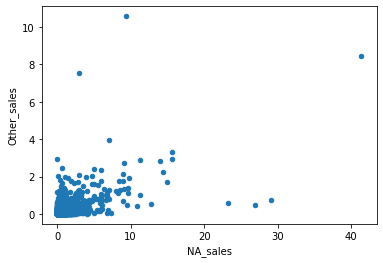

In [16]:
data.plot(x='NA_sales', y='Other_sales', kind='scatter')

Делая выводы по полученному графику, можно заметить, что в данном случае взаимосвязь рынков игр уже посильнее, чем с Японией, но все же меньше, чем с Европой.

Поэтому, попробуем построить график зависимости "`EU_sales`" от "`JP_sales`".

<AxesSubplot:xlabel='EU_sales', ylabel='JP_sales'>

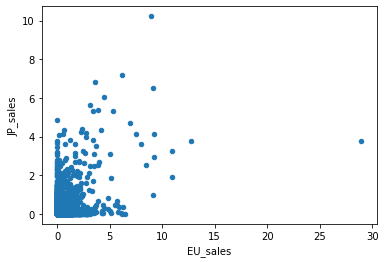

In [17]:
data.plot(x='EU_sales', y='JP_sales', kind='scatter')

Как и в случае с графиком зависимости "`NA_sales`" от "`JP_sales`", зависимость рынков настолько мала, что можно считать, что её нет. Отсюда, можно сделать вывод о том, что рынок игр в Японии отстранён от остального мира, хоть взаимосвязь все же присутствует. Но основная масса игр, продаваемых в Японии, в остальных странах продаётся гораздо меньше.

Далее, выведем график для столбцов "`EU_sales`" и "`Other_sales`".

<AxesSubplot:xlabel='EU_sales', ylabel='Other_sales'>

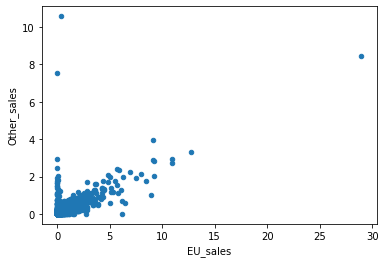

In [18]:
data.plot(x='EU_sales', y='Other_sales', kind='scatter')

В отличии от предыдущего графика, в данном графике четко видна зависимость продаж игр для этих двух регионов. Хотя есть конечно же и исключения, в виде нескольких точек, но они незначительны, и основную зависимость не ломают. Из этого следует, что рынки игр взаимосвязаны между собой.

Попробуем вывести последний график зависимости продаж между регионами, а именно между "`Other_sales`" и "`JP_sales`".

<AxesSubplot:xlabel='JP_sales', ylabel='Other_sales'>

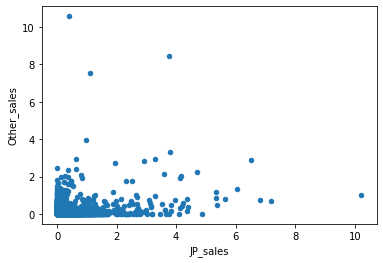

In [19]:
data.plot(x='JP_sales', y='Other_sales', kind='scatter')

Как и в случае с другими графиками зависимости, где присутствует Японский игровой рынок, взаимосвязи между данными столбцами нету, что еще больше подтверждает тот факт, что в Японии рынок игровой индустрии значительно отличается от всего остального мира.

Далее, попробуем создать диаграмму рассеяния и для других параметров. Но, поскольку остальные числовые значения так или иначе зависят от числа продаж в странах, то добавим в датасет новый столбец "`Sales`", который будет высчитываться как результат сложения всех остальных столбцов с продажами. И после сложения, выведем получившуюся таблицу на экран, чтобы зрительно оценить результаты сложения.

In [38]:
data['Sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['Other_sales']
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0,-,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,-,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,0.0,0,-,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,0.0,0,-,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,0.0,0,-,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,0.0,0,-,0.01


После зрительного подтверждения правильности создания нового столбца, создадим новую диаграмму зависимости "`Year_of_Release`" от "`Sales`".

<AxesSubplot:xlabel='Year_of_Release', ylabel='Sales'>

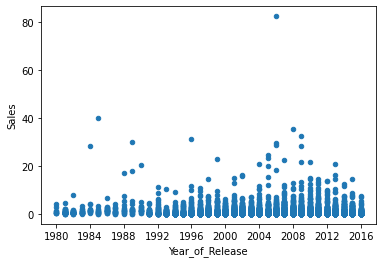

In [21]:
data.plot(x='Year_of_Release', y='Sales', kind='scatter')

Как видно из ответа команды, получились просто линейные столбцы, на оси ординат которого расположено кол-во проданных копий игр, а на оси абсцисс - годы издания игр. И как видно по данному графику, общий тренд тут просматривается, а именно, что количество проданных игр с годами только увеличивается. Таким образом, можно сделать вывод о том, что между столбцами "`Year_of_Release`" и "`Sales`" есть взаимозависимость.

И наконец, создадим последнюю из возможных диаграмм рассеяния, а именно для столбцов "`Sales`" и "`Critic_Score`".


<AxesSubplot:xlabel='Critic_Score', ylabel='Sales'>

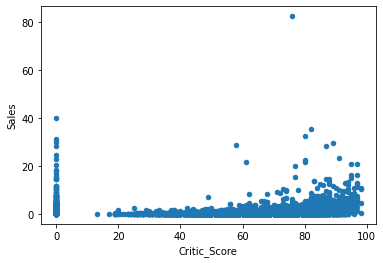

In [22]:
data.plot(x='Critic_Score', y='Sales', kind='scatter')

В данном случае тоже просматривается некоторая взаимосвязь между осью абсцисс и осью ординат. Получается, чем выше оценки критиков, тем больше продаж у игры по всему миру. Однако, присутствуют игры, которые не были оценены критиками, но при этом продаж у игры достаточно много. Этим и объясняется вертикальный столб около нулевого значения по оси абсцисс.

Также, все вышеперечисленные графики можно было поместить в одну матрицу диаграмм рассеяния, которая представляет из себя все те же графики, только представленные в виде одного большого графика, как показано ниже

array([[<AxesSubplot:xlabel='NA_sales', ylabel='NA_sales'>,
        <AxesSubplot:xlabel='EU_sales', ylabel='NA_sales'>,
        <AxesSubplot:xlabel='JP_sales', ylabel='NA_sales'>,
        <AxesSubplot:xlabel='Other_sales', ylabel='NA_sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='NA_sales'>,
        <AxesSubplot:xlabel='Sales', ylabel='NA_sales'>],
       [<AxesSubplot:xlabel='NA_sales', ylabel='EU_sales'>,
        <AxesSubplot:xlabel='EU_sales', ylabel='EU_sales'>,
        <AxesSubplot:xlabel='JP_sales', ylabel='EU_sales'>,
        <AxesSubplot:xlabel='Other_sales', ylabel='EU_sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='EU_sales'>,
        <AxesSubplot:xlabel='Sales', ylabel='EU_sales'>],
       [<AxesSubplot:xlabel='NA_sales', ylabel='JP_sales'>,
        <AxesSubplot:xlabel='EU_sales', ylabel='JP_sales'>,
        <AxesSubplot:xlabel='JP_sales', ylabel='JP_sales'>,
        <AxesSubplot:xlabel='Other_sales', ylabel='JP_sales'>,
        <AxesSubplot:xlabel

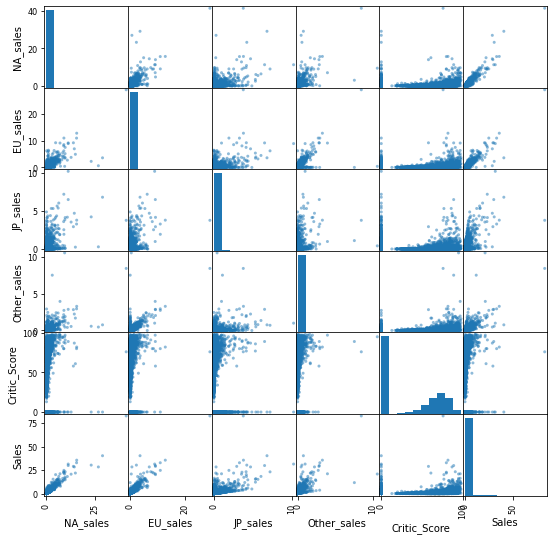

In [23]:
pd.plotting.scatter_matrix(data, figsize=(9,9))

Таким образом, подводя итог по работе в данном разделе, можно заключить, что взаимосвязи между некоторыми данными присутствуют, а именно между:

- "`NA_Sales`" и "`EU_Sales`";
- "`EU_Sales`" и "`Other_Sales`";
- "`Critic_Score`" и "`Sales`".

[Вернуться в начало](#intro)

## Исследование взаимосвязей между переменными <a id='2.3'></a>

Исследование будет проводиться с помощью оценки коэффициента корреляции и ковариации.

Корреляцией называют взаимосвязь двух или более случайных величин. Она помогает определить наличие (или отсутствие) линейной связи между величинами и принимает значение от -1 до 1.


Если с ростом первой величины растёт и вторая, то коэффициент корреляции *положителен*.     
Если при изменении одной величины другая остаётся прежней, то коэффициент равен *0*.    
Если рост одной величины связан с уменьшением другой, то коэффициент *отрицательный*.

Чем ближе коэффициент корреляции к крайним значениям (1 или -1), тем теснее линейная взаимосвязь. Если значение близко к нулю, это означает, что линейная связь слабая или отсутствует совсем.

Однако, бывают случаи, когда коэффициент нулевой не потому, что связи нет, а из-за того, что у неё более сложная, не линейная связь. Тогда поиск корреляции считается нецелесообразным.

В библиотеке **Pandas** коэффициент корреляции находят при помощи метода "`.corr()`". Поэтому, найдем коэффициенты корреляции для полученных в предыдущем пункте столбцах.

In [27]:
print('Корреляция между NA_sales и EU_sales = ', data['NA_sales'].corr(data['EU_sales']))
print('Корреляция между EU_sales и Other_sales =', data['EU_sales'].corr(data['Other_sales']))
print('Корреляция между Critic_Score и Sales = ', data['Critic_Score'].corr(data['Sales']))

Корреляция между NA_sales и EU_sales =  0.7653410586656545
Корреляция между EU_sales и Other_sales = 0.722795813287681
Корреляция между Critic_Score и Sales =  0.14870108043360833


Как видно из полученных значений, *корреляция* между значениями *продаж между регионами*, по шкале Чеддока, является весьма *высокой*. Однако, корреляция между *оценками критиков* и *общими продажами* по той же шкале, классифицируется как *слабая*, но если судить по графику данной зависимости, она просто является не линейной, а экспоненциальной.

Далее, попробуем рассчитать коэффициент *ковариации* при помощи метода "`.cov()`". Следовательно, найдем данные коэффициенты ковариации для полученных в предыдущем пункте столбцах.

In [6]:
print('Ковариация между NA_sales и EU_sales = ', data['NA_sales'].cov(data['EU_sales']))
print('Ковариация между EU_sales и Other_sales =', data['EU_sales'].cov(data['Other_sales']))
print('Ковариация между Critic_Score и Sales = ', data['Critic_Score'].cov(data['Sales']))

Ковариация между NA_sales и EU_sales =  0.3134183193538304
Ковариация между EU_sales и Other_sales = 0.06793441395243964
Ковариация между Critic_Score и Sales =  6.217464633732386


Как видно из полученных значений, поскольку ковариация все всех трёх случаях положительна, это означает, что обе величины, для которых измеряется ковариация, демонстрируют однонаправленное движение. Однако, по абсолютному значению коэффициента *ковариации* нельзя судить о силе взаимосвязанности двух величин, так как **её масштаб зависит от дисперсий величин**. Поэтому, для определения силы связи, обычно использую *нормализованную версию* ковариации, или же *коэффициент корреляции*.

Таким образом, подводя итоги после выполнения данной части отчета, можно отметить, что в данной части работы была проверена связь между некоторыми столбцами исходного датасета. Было установлено, что связь между значениями продаж по разным странам имеют линейную зависимость, поскольку коэффициент корреляции у них имеет достаточно большое значение. Также, было проверено, что зависимость между оценками критиков и общими продажами имеет нелинейную зависимость, поскольку коэффициент корреляции у данной связи очень маленький.

[Вернуться в начало](#intro)

## Тепловая карта <a id='2.4'></a>

Необходимо построить тепловую карту корреляции при помощи метода "`.heatmap()`".

Для начала, попробуем рассчитать коэффициенты корреляции для всех числовых значений исходного датасета. Для этого также используется метод "`.corr()`".

In [28]:
print(data.corr())

              NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
NA_sales      1.000000  0.765341  0.449668     0.638695      0.153598   
EU_sales      0.765341  1.000000  0.435079     0.722796      0.170642   
JP_sales      0.449668  0.435079  1.000000     0.291090     -0.043779   
Other_sales   0.638695  0.722796  0.291090     1.000000      0.176165   
Critic_Score  0.153598  0.170642 -0.043779     0.176165      1.000000   
Sales         0.941021  0.901239  0.612334     0.749280      0.148701   

                 Sales  
NA_sales      0.941021  
EU_sales      0.901239  
JP_sales      0.612334  
Other_sales   0.749280  
Critic_Score  0.148701  
Sales         1.000000  


Из полученных значений видно, взаимосвязь между продажами по отдельным регионам все таким присутствует, хоть и умеренная. А вот вопреки графикам, коэффициент корреляции между оценками критиков и продажам по регионам является очень слабый, а иногда и отрицательной, что говорит о нелинейности связи между этими параметрами.

Далее, на основе полученной выше таблицы коэффициентов корреляции построим тепловую карту корреляции. Для этого необходимо импортировать библиотеку **Seaborn** и в ней использовать метод "`.heatmap()`", передавая в качестве параметров данному методу таблицу коэффициентов корреляции и цвета ячеек таблицы. Получившийся результат показан ниже:

<AxesSubplot:>

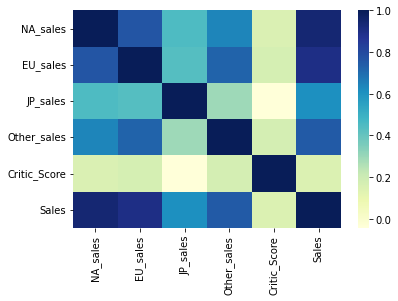

In [32]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu")

Как видно из выходного рисунка, на главной диагонали находиться только единичные значения, поскольку в ячейках на главной диагонали пересекаются два одинаковых столбца. Если же не брать во внимание главную диагональ, то наиболее высокий коэффициент корреляции имеется в ячейке зависимости "`Sales`" от "`NA_sales`", а наиболее маленький коэффициент - в ячейке зависимости "`JP_sales`" от "`Critic_Score`".

[Вернуться в начало](#intro)

## Интерпретация результатов <a id='2.5'></a>

Выполним интерпретацию результатов

Выполнение интерпретации результатов корреляции и ковариации заключается в том, что необходимо ответить на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными исходного датасета. Поскольку в предыдущем пункте была выведена тепловая карта корреляции между всеми столбцами, то при ответе на поставленные вопросы будет происходить ссылка на предыдущий пункт, и, в частности, на таблицу коэффициентов корреляции.

Используя коэффициент *ковариации*, получится узнать только направление изменения двух величин, т.е. однонаправленно оно или разнонаправленно. Если ковариация *положительна*, то переменные имеют тенденцию демонстрировать *одинаковое* поведение. А если же ковариация *отрицательна*, то переменные имеют тенденцию показывать *противоположное* поведение. Величину ковариации трудно интерпретировать, поскольку она не нормирована, т.е. находиться в интервале (от *минус бесконечности* до *плюс бесконечности*). Однако, нормализованная версия ковариации, *коэффициент корреляции*, своей величиной показывает силу линейной зависимости. Поэтому, в качестве основного показателя был выбран коэффициент корреляции.

Итак, начнём со значениями корреляций между столбцом "`Sales`" и остальными столбцами. Как видно из тепловой карты корреляции, наибольшее влияние на "`Sales`" оказывает "`NA_sales`" с коэффициентом, равным *0.941021*. Значение данного коэффициента является по шкале Чеддока *весьма высоким*. Отсюда следует вывод о том, что продажи игр в Североамериканском регионе очень сильно влияет на общий показатель продаж игр во всём мире.

Второй по степени влияния на столбец "`Sales`" является "`EU_sales`" с коэффициентом *0.901239*. Полученное значение по шкале Чеддока также является *весьма высоким*, следовательно, количество продаж игр в Европейском регионе также весьма сильно влияет на общим объем продаж для всего мира.

Далее по убыванию степени влияния на столбец "`Sales`" идет столбец "`Other_sales`", с коэффициентом корреляции равным *0.749280*. Данное значение по шкале Чеддока уже имеет иную качественную характеристику силы связи, а именно *высокую*. Таким образом, можно заключить то, что продажи во всём остальном мире не так сильно влияют на общий объем продаж для всего мира, но имеет всё же весьма ощутимое влияние.

И наконец, самую незначительную степень влияния на "`Sales`" имеет столбец "`JP_sales`". Для данной взаимосвязи коэффициент корреляции равен *0.612334*, что весьма значительно отличается от всех остальных коэффициентов. По шкале Чеддока данному значению присвоена *заметная* сила связи, иначе говоря, Японский игровой рынок, конечно, влияет на общемировые показатели продаж игр, но меньше всех остальных регионов.

И в конце хотелось бы отметить еще один тип связи, который присутствует для столбца "`Sales`", а именно связь между ним и "`Critic_Score`". Данная связь является самой низкой для столбца с продажами с коэффициентом корреляции равным *0.148701*, что разительно отличается от всех остальных коэффициентов. Даже по шкале Чеддока такой коэффициент соответствует всего лишь *слабой* силе связи. Отсюда следует вывод, что либо игроки чаще всего не обращают внимание на мнение критиков при покупке игр, либо данный тип связи является не линейным.

И раз уж начался разбор связи между столбцом "`Critic_Score`" и остальными, то рассмотрим взаимосвязь между ним и "`NA_sales`". Коэффициент корреляции для такой связи равен *0.153598*, что по шкале Чеддока является очень *слабой* связью. И как уже было написано выше, вывод, который можно сделать из этого факта, заключается в том, что либо игроки из Северной Америки крайне мало доверяют мнению экспертов при покупке игр, либо данный тип связи является не линейным.

Следом за "`NA_sales`", для столбца "`Critic_Score`" идут два столбца с практически одинаковым коэффициентом корреляции, а именно "`EU_sales`" и "`Other_sales`", со значениями коэффициентов равными *0.170642* и *0.176165* соответственно. Данные коэффициенты, конечно, слегка выше, чем у "`NA_sales`", но все также по шкале Чеддока являются *слабыми*. То есть, либо игроки из Европы и остального мира немного больше доверяют критикам, чем в Северной Америке, однако по-прежнему очень слабо, либо данный тип связи является не линейным.

И напоследок осталась один тип взаимосвязи, а именно между "`Critic_Score`" и "`JP_sales`", значение коэффициента которого является отрицательное число *-0.043779*. По шкале Чеддока это означает практически отсутствие линейной связи (нижняя граница *слабой* связи). Отсюда следует вывод, что либо данный тип связи является не линейным, либо игрокам вообще плевать на мнение критиков при покупке игр.

И далее следуют взаимосвязи между продажами в различных регионах мира. Рассмотрим эти типы связи так, как они идут в тепловой карте корреляции.

Сперва, изучим связь между "`EU_sales`" и "`NA_sales`". Коэффициент корреляции данной связи равен *0.765341*, что по шкале Чеддока является *высоким* значением силы связи. Следовательно, рынок игр в Европе сильно зависит от рынка в Северной Америке.

Далее, рассмотрим весьма близкие по значению коэффициента корреляции взаимосвязи между "`JP_sales`" и "`NA_sales`" с "`EU_sales`", коэффициенты которых равны соответственно *0.449668* и *0.435079*. Если давать качественную характеристику данным значениям, то по шкале Чеддока они соответствуют *умеренной* силе связи. Таким образом, взаимосвязь между рынками Японии и Северной Америки с Европой иногда пересекаются в общемировых трендах, однако зачастую Япония отличается от них.

И наконец, идут последние три связи между столбцами "`Other_sales`" с "`NA_sales`", "`EU_sales`" и "`JP_sales`". Рассмотрим первую связь из них, то есть между "`Other_sales`" и "`NA_sales`". Коэффициент корреляции для данной связи равняется *0.638695*, что по шкале Чеддока соответствует *заметной* силе связи. Получается, рынок продаж игр в Северной Америке в значительной степени влияет на рынок продаж для всего остального мира.

Далее, рассмотрим взаимосвязь между "`Other_sales`" и "`EU_sales`", с коэффициентом корреляции равным *0.722796*. По шкале Чеддока это значение соответствует *высокой* силе взаимосвязи. Отсюда получается то, что рынок игр в Европе имеет большее влияние на остальной мир, чем рынок Северной Америки.

И завершающей связью между столбцами является между "`Other_sales`" и "`JP_sales`". Коэффициент корреляции для данной связи равняется *0.291090*, что по шкале Чеддока немного не дотягивает до умеренной, и является *слабой* силой связи. Отсюда следует вывод, что рынок игр в Японии очень слабо влияет на рынок продажи игр для всего остального мира.

[Вернуться в начало](#intro)

## Изучение целевого признака <a id='2.6'></a>

Поиск и влияющие факторы на признак.

В данной части отчета необходимо ответить на вопрос: "Имеется ли в наборе данных столбец, который является целевым признаком?". Также, потребуется ответить на вопрос: "Какие факторы больше всего влияют на целевой признак?"

И ответом будет "*Да*". Целевым признаком в данной таблице является столбец "`Sales`", который представляет из себя сумму продаж игр по всей планете. И больше всего на общий объем продаж влияет количество продаж в Североамериканском регионе, поскольку в нём проживает самое большое количество геймеров относительно всех остальных регионов Земли.

[Вернуться в начало](#intro)

## Выводы <a id='2.7'></a>

В ходе выполнения данной лабораторной работы я улучшил свои навыки работы с Jupiter-блокнотами. Вновь осуществил предварительную обработку данных, а также вспомнил этапы работы с библиотекой **Pandas**.

Также, в данной лабораторной работе я узнал немного нового, например, я узнал, как создавать точечные диаграммы данных из двух столбцов при помощи метода "`.plot()`", узнал, как искать коэффициент корреляции между двумя наборами данных при помощи метода "`.corr()`", и коэффициент ковариации при помощи метода "`.cov()`". Кроме всего прочего, познакомился с библиотекой **Seaborn** и методом "`.heatmap()`", входящим в состав данной библиотеки. Помимо этого, выполнил интерпретацию результатов корреляции, отвечая при это на вопросы о наличии (или отсутствии) линейной взаимосвязи между переменными. И наконец, в данной работе нашёл целевой признак.

Таким образом, на этапе **предварительной обработки** данных мне пришлось избавляться от пустых значений двумя существующими способами: **полным удалением строки**, содержащей пустые значения, и **заменой пустых значений** другими (например, нулями). После этого, выяснил, что дубликатов, как явных, так и неявных, в данном датасете нету. И в конце выполнения работ по предварительной обработки данных, пришлось изменить тип данных столбца с годами запуска игр с *текстового* типа, но *формат даты*.

На следующем этапе, в начале были выведены гистограммы всех имеющихся столбцов со значениями. Также, было получено, поскольку исходный датасет состоит из `16715` строк, то есть считается достаточно большим, то данные гистограммы искажены, ведь внутри таблицы имеется очень много нулевых значений. Помимо этого, поскольку данные о продажах указаны в миллионах, но без нулей (т.е. просто количество миллионов), то от этого получается, что все значения с продажами на гистограмме выглядят как один столбец, хотя это не так. Затем, были выведены 8 точечных диаграмм с различными осями абсцисс и ординат. Также, в ходе выполнения этого шага, в исходный датасет я добавил ещё один столбец, который является суммой продаж игр во всех приведённых в таблице регионах. И в конце выполнения данного этапа я сделал вывод о том, что линейные взаимосвязи между некоторыми данными присутствуют, а именно между:

- "`NA_Sales`" и "`EU_Sales`";
- "`EU_Sales`" и "`Other_Sales`";
- "`Critic_Score`" и "`Sales`".

Затем, уже на следующем этапе, я пытался доказать выведенные на предыдущем этапе утверждения о наличии взаимосвязей между столбцами путем высчитывания коэффициента корреляции. И был сделан вывод о том, что связь между значениями продаж по разным странам имеют линейную зависимость, поскольку коэффициент корреляции у них имеет достаточно большое значение. Также, было проверено, что зависимость между оценками критиков и общими продажами имеет нелинейную зависимость, поскольку коэффициент корреляции у данной связи очень маленький, но при этом чисто визуально на графике зависимость присутствует.

Далее, на этапах "**Тепловая карта**" и "**Интерпретация результатов**" были выяснены остальные коэффициенты корреляции для остальных столбцов. Оказалось, что взаимосвязь между столбцами с количеством продаж игр по разным регионам в среднем имеет неплохой уровень взаимосвязи между собой. Также, было получено, что взаимосвязь между оценками критиков и количеством продаж по разным регионам либо имеет нелинейную зависимость, либо зависимость просто отсутствует. И наконец, стало известно, что наибольшее влияние на количество продаж игр по всему миру имеет количество продаж в Североамериканском регионе.

И наконец, финальным этапом стал поиск целевого признака данного датасета. И им стал новый столбец "`Sales`", который представляет из себя сумму продаж игр по всей планете. А также, был найден столбец, который больше всего влияет на общий объем продаж, а именно количество продаж в Североамериканском регионе, поскольку в нём, видимо, проживает самое большое количество геймеров относительно всех остальных регионов Земли.

## Дополнительное задание <a id='2.8'></a>

### Задание №1 

В первом дополнительном задании необходимо реализовать `boxplot` для двух любых столбцов.

**Блочная диаграмма** (или же *boxplot*) - это визуальное представление групп числовых данных через их квартили. Также используется для обнаружения выбросов в наборе данных. Диаграмма эффективно формирует сводку данных с помощью простой рамки и усов и позволяет легко сравнивать группы. Блочная диаграмма суммирует выборочные данные с использованием 25-го, 50-го и 75-го процентилей, или же 1-го, 2-го и 3-го квартилей.

Для построения блочных диаграмм не нужно никаких особых библиотек, данная функция встроена в библиотеку **Pandas**.

Для начала, выведем первую пятерку строк из исходного набора данных для того, чтобы понять, для каких столбцов можно создать `boxplot`.

In [39]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0,-,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,-,31.38


Исходя из выведенных данных, построим `boxplot` для жанров игр, а в качестве значений возьмем оценку критиков. Получиться диаграмма, показанная ниже:

<AxesSubplot:title={'center':'Critic_Score'}, xlabel='Genre'>

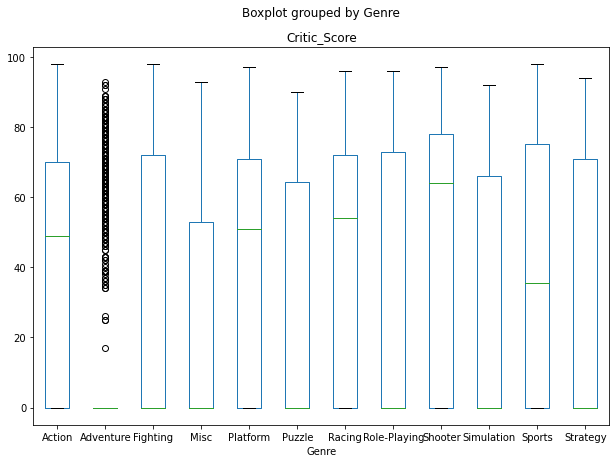

In [86]:
data.boxplot(by='Genre', column=['Critic_Score'], figsize=(10, 7), grid=False)

По выведенной диаграмме видно следующее:
- Начало *"коробочки"* - значение нижнего квартиля;
- Зеленая линия внутри *"коробочки"* - медиана, или же значение второго квартиля;
- Верхняя часть *"коробочки"* - значение вехнего квартиля;
- Полоса, находящаяся над *"коробочкой"* - максимальное значение данного столбца.
- Точками обозначаются величины, значение которых больше максимального.

Таким образом, делая вывод по данной диаграмме, можно заметить, что некоторые жанры игр пользуются меньшим спросом среди критиков, чем другие. В качестве примера можно привести столбец "`Puzzle`", максимальная оценка критиков которая самая низкая среди всез остальных значений. Или же, столбец "`Misc`", у которого значение 3-го квартиля является самым низким среди всех.

### Задание №2

Во втором дополнительном задании необходимо создать график, где по оси oX - платформа, а по оси oY - средние суммарные продажи.

Для того, чтобы решить поставленную задачу, для начала необходимо создать сводную таблицу, в которой в качестве строк будут названия игровых платформ, а в качестве значений - средние суммарные продажи по всему миру. Ниже представлены первые 5 значений в полученной сводной таблице.

In [92]:
pt = data.pivot_table(index='Platform', values='Sales', aggfunc='mean')
pt.head()

,Sales
Platform,
2600,0.729173
3DO,0.033333
3DS,0.498077
DC,0.306731
DS,0.374765


Затем, при помощи метода "`.bar()`" создадим гистограмму, в которой отобразим полученные результаты. Данная гистограмма представлена ниже:

<AxesSubplot:title={'center':'Средние продажи по платформам в млн. штук'}, xlabel='Platform', ylabel='AvgSales'>

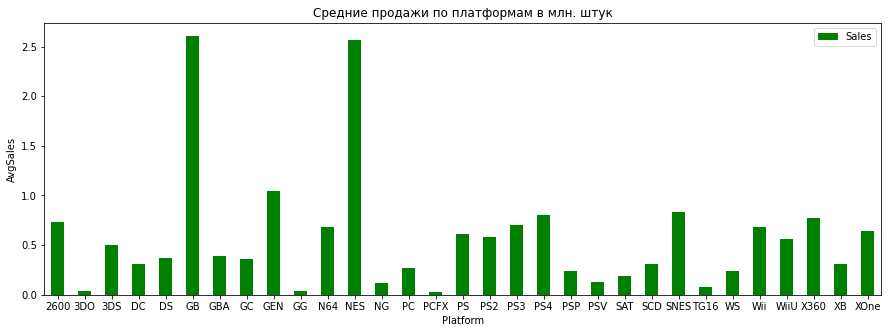

In [93]:
pt.plot.bar(figsize=(15,5), rot=0, ylabel='AvgSales', title='Средние продажи по платформам в млн. штук', color='green')

Исходя из полученных результатов, можно сделать вывод о том, что наибольшее число продаж игр по всему миру составили игры для *GameBoy* и *Nintendo Entertainment System*.